### Webscrape Stock Data

In [83]:
%run ../../../_config/base/base.ipynb

In [84]:
%run ../../../_util/core/core.ipynb

## Webscrape



====== WebDriver manager ======
Current google-chrome version is 107.0.5304
Get LATEST driver version for 107.0.5304
Driver [C:\Users\joshu\.wdm\drivers\chromedriver\win32\107.0.5304.62\chromedriver.exe] found in cache
C:\Users\joshu\AppData\Local\Temp\ipykernel_15412\3590005235.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


0     2022-11-01
1     2022-11-02
2     2022-11-03
3     2022-11-04
4     2022-11-07
5     2022-11-08
6     2022-11-09
7     2022-11-10
8     2022-11-11
9     2022-11-14
10    2022-11-15
11    2022-11-16
12    2022-11-17
13    2022-11-18
Name: Date, dtype: object
Headlines:
[<div aria-level="3" class="mCBkyc ynAwRc MBeuO nDgy9d" role="heading" style="-webkit-line-clamp:3">After Hours Most Active for Nov 1, 2022 : SHV, ENB, BFH ...</div>, <div aria-level="3" class="mCBkyc ynAwRc MBeuO nDgy9d" role="heading" style="-webkit-line-clamp:3">Spotify is going to war with Apple after the App Store rejected its big new 
feature</div>, <div aria-level="3" class="mCBkyc ynAwRc MBeuO nDgy9d" role="heading" style="-webkit-line-clamp:3">Dow closes 500 points lower, Nasdaq sheds 3% as Fed Chair Powell signals 
intent to continue hiking rates</div>, <div aria-level="3" class="mCBkyc ynAwRc MBeuO nDgy9d" role="heading" style="-webkit-line-clamp:3">Apple supplier Foxconn quadruples bonuses to staff hit b
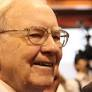
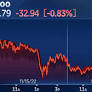
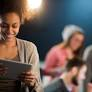
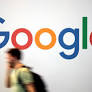
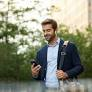
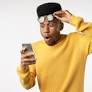
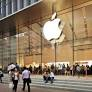
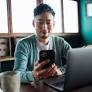
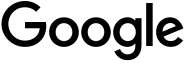
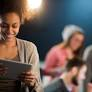
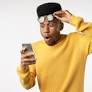
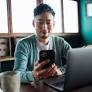

In [85]:
driver = webdriver.Chrome(ChromeDriverManager().install())
df_dict = {}
list_paths = []

for name in LIST_OF_TECH_STOCKS:
    data = pd.read_csv("../../../Data/StockData/" + name)
    list_date = getDate(data)
    headline_data = []
    datetime_extract_data = []
    article_published_data = []
    publisher = []
    print(list_date)
    for dates in list_date:
        counter = 0
        link = newsLink(name + " " + dates)
        driver.get(link)
        content = driver.page_source
        soup = BeautifulSoup(content)
        headlines = soup.find_all(class_="mCBkyc ynAwRc MBeuO nDgy9d")
        headlines_date = soup.find_all(class_="OSrXXb ZE0LJd YsWzw")
        headlines_publisher = soup.find_all(class_="QyR1Ze ZGomKf")
        print("Headlines:")
        print(headlines)
        for val in headlines:
            headlineDate = headlines_date[counter].get_text().strip()
            headlinePublisher = headlines_publisher[counter].get_text().strip()
            print(headlines_publisher[counter])
            strVal = val.get_text().strip()
            headline_data.append(strVal)
            datetime_extract_data.append(dates) # change currtime
            article_published_data.append(headlineDate)
            publisher.append(headlinePublisher)
            counter += 1
        
            print(len(headlineDate))
            print(len(datetime_extract_data))
            print(len(article_published_data))
    d = {'Date': datetime_extract_data, 
        'Headline Data': headline_data,
        'Article Published Date': article_published_data,
        'Article Publisher': publisher
        }
    df_extract = pd.DataFrame(d)
    df_extract.head()
    print(soup)
    df_dict[val] = df_extracta
    list_paths.append(MNT_NEWSDATA + name)
    print(df_extract.head())
    time.sleep(60)
    break

In [86]:
print(df_extract.head(40))

          Date                                      Headline Data  \
0   2022-11-01  After Hours Most Active for Nov 1, 2022 : SHV,...   
1   2022-11-01  Spotify is going to war with Apple after the A...   
2   2022-11-01  Dow closes 500 points lower, Nasdaq sheds 3% a...   
3   2022-11-01  Apple supplier Foxconn quadruples bonuses to s...   
4   2022-11-01  After Hours Most Active for Oct 28, 2022 : SHV...   
5   2022-11-01  Pre-Market Most Active for Oct 28, 2022 : TQQQ...   
6   2022-11-01  Wall St slips as jobs data dents hopes for Fed...   
7   2022-11-01  Shanghai Disney visitors told to stay home aft...   
8   2022-11-01  2 Apple executives, including one who has been...   
9   2022-11-01  Apple, Bank of America, and Chevron Earnings S...   
10  2022-11-02  After Hours Most Active for Nov 2, 2022 : OABI...   
11  2022-11-02                          Is Apple Stock a Buy Now?   
12  2022-11-02          Is Now the Right Time to Buy Apple Stock?   
13  2022-11-02  IPhone Supply Chai

### Move Data to Data Folder

In [87]:
idx = 0
for val in df_dict:
    data = df_dict[val]
    writeCSV(data, list_paths[idx])
    idx += 1